In [44]:
import pandas as pd
import numpy as np 
df=pd.read_csv("zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [45]:
df.describe

<bound method NDFrame.describe of     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  leg

In [46]:
df.shape

(101, 18)

In [47]:
list(df)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [48]:
df.drop("animal name", axis=1, inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [49]:
df["type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [50]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [51]:
df.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

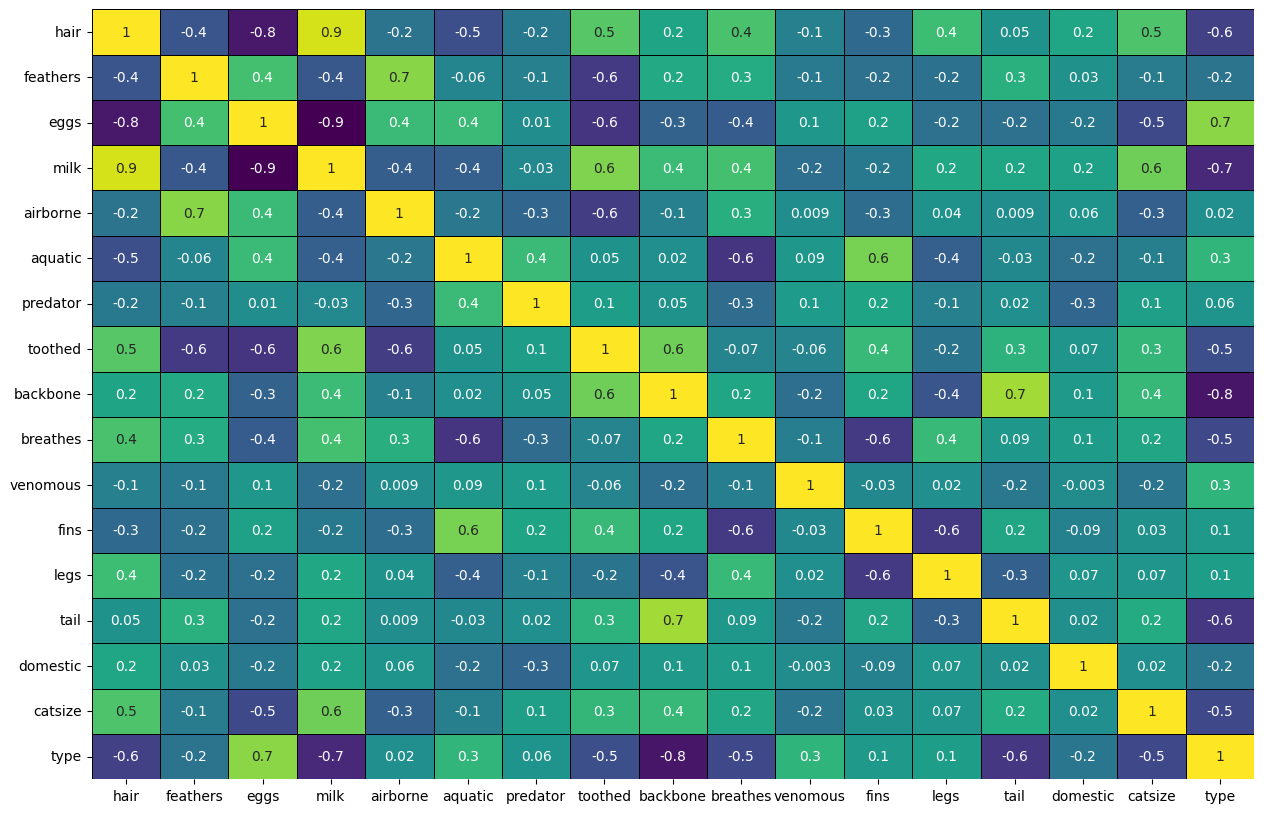

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black');

In [53]:
import plotly.express as px
NumberofPlayers = df.groupby(pd.Grouper(key='type')).size().reset_index(name='count')
fig = px.treemap(NumberofPlayers, path=['type'], values='count')
fig.update_layout(title_text='Animal Class Types Distribution Tree',
                  title_x=0.5, title_font=dict(size=25))
fig.update_traces(textinfo="label+value")

fig.show()

In [54]:
x = df['type'].value_counts().index.tolist()
y = df['type'].value_counts().tolist()

fig = px.bar(x=x, y=y, color=x, title="Animal Class Type Distribution",
             labels={
                'x': 'Animal Class',
                'y': 'count'
                },)
fig.show()

In [55]:
NumberofPlayers = df.groupby(pd.Grouper(key='type')).size().reset_index(name='count')
print(NumberofPlayers)

   type  count
0     1     41
1     4     13
2     2     20
3     7     10
4     6      8
5     5      4
6     3      5


In [56]:
X = df.drop("type", axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [57]:
y = df["type"]
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
len(X_train), len(X_test)

(80, 21)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [61]:
y_pred = knn.predict(X_test)

In [62]:
print(confusion_matrix(y_test,y_pred))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


In [63]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)
print(classification_report(y_test,y_pred))

Accuracy obtained by K Neighbors Classifier model: 95.23809523809523
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.

C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.

C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.

C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.

C:\Users\Bharath Yadav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarn

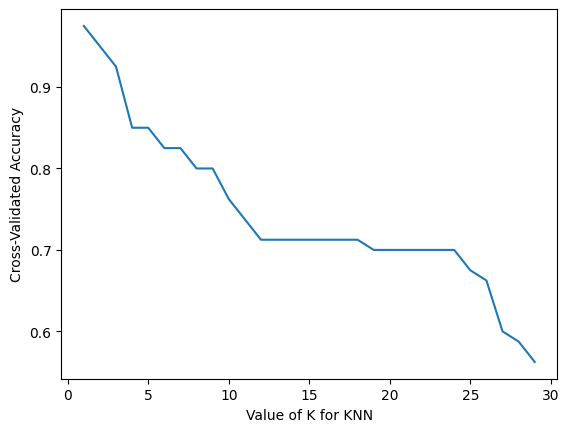

In [64]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [65]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

1.0


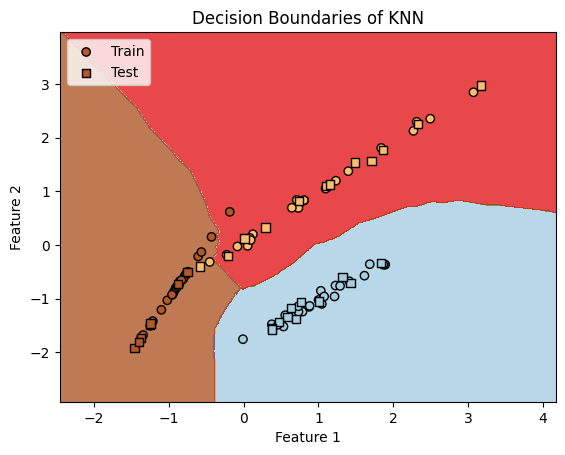

In [69]:

from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic dataset
X, y = make_classification(
    n_features=2,  # Two features for 2D visualization
    n_classes=3,   # Number of classes
    n_redundant=0, # No redundant features
    n_clusters_per_class=1, 
    random_state=42
)



# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired, marker='o', label='Train')

# Plot testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired, marker='s', label='Test')

# Add labels and title
plt.title("Decision Boundaries of KNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="upper left")
plt.show()


In [ ]:
The key hyperparameters in K-Nearest Neighbors (KNN) are:

n_neighbors (K):

This is the most crucial hyperparameter. It determines the number of nearest neighbors considered when making predictions.
A small K can lead to overfitting, as the model becomes sensitive to noise in the data.
A large K can lead to underfitting, as the model may miss important local patterns.
The optimal K value often depends on the specific dataset and problem.
Weights:

'uniform': All neighbors are weighted equally.
'distance': Weights are assigned inversely proportional to their distance from the query point. Closer neighbors have a greater influence on the prediction.
Metric:

This defines how distances between data points are calculated. Common metrics include:
'euclidean': Euclidean distance (straight-line distance).
'manhattan': Manhattan distance (sum of absolute differences).
'minkowski': Generalizes Euclidean and Manhattan distances.
Algorithm:

'auto': Lets scikit-learn choose the most appropriate algorithm based on the values of n_neighbors and the dimensionality of the data.
'ball_tree': Uses a tree-based data structure for efficient distance calculations.
'kd_tree': Another tree-based data structure, often more efficient than ball_tree in high-dimensional spaces.
'brute': Performs a brute-force search, comparing the query point to all training points. Can be slow for large datasets

In [ ]:
Here’s a summary of common distance metrics in KNN without formulas:

Euclidean Distance: Measures straight-line distance between two points; default for KNN.

Manhattan Distance: Measures the distance by summing horizontal and vertical moves, like navigating a grid.

Minkowski Distance: A generalized distance metric that can adapt to both Euclidean and Manhattan distances by tuning a parameter.

Hamming Distance: Counts the number of differences between categorical features.

Chebyshev Distance: Takes the largest single feature difference; useful for grid-like problems.

Mahalanobis Distance: Considers correlations between features, useful for datasets with dependent features.

Cosine Similarity (as distance): Focuses on the angle between vectors rather than their magnitude, ideal for text and high-dimensional data.